# 네이버 VIEW - 웹 크롤링 후 텍스트 형식으로 저장

## Step 1. 필요한 모듈과 함수를 임포트하고 검색어 입력받기

In [1]:
from bs4 import BeautifulSoup

In [2]:
from selenium import webdriver

In [3]:
import time

In [4]:
import sys

In [6]:
query_txt = input('크롤링할 키워드는 무엇입니까? : ')

크롤링할 키워드는 무엇입니까? : 인공지능


In [7]:
query_txt

'인공지능'

## Step 2. 크롤링 결과 데이터를 저장할 디렉토리와 파일명 지정하기

In [8]:
f_name = input('검색 결과를 저장할 파일경로와 파일명을 지정하세요(예시: C:/temp/네이버_VIEW.txt)') 

검색 결과를 저장할 파일경로와 파일명을 지정하세요(예시: C:/temp/네이버_VIEW.txt)C:/temp/네이버_VIEW.txt


In [9]:
f_name

'C:/temp/네이버_VIEW.txt'

## Step 3. 크롬 드라이버를 사용해서 웹 브라우저 실행하기

In [10]:
path = 'C:/Temp/chromedriver_112/chromedriver.exe'

In [11]:
path

'C:/Temp/chromedriver_112/chromedriver.exe'

In [12]:
driver = webdriver.Chrome(path)

## Step 4.  네이버 홈페이지 들어가기

In [13]:
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="a9b1f98993b9e2a4af4b0787c7712d2e")>

In [14]:
driver.get('https://www.naver.com')
time.sleep(2)

## Step 5. 입력 창 클릭하여 검색어 전달하기

F12 키를 이용하여 입력창에 해당하는 HTML 소스 코드 부분을 찾는다.     
id를 활용할 경우, id name은 query 임을 찾음  

In [15]:
element = driver.find_element_by_id('query') 

In [16]:
element

<selenium.webdriver.remote.webelement.WebElement (session="a9b1f98993b9e2a4af4b0787c7712d2e", element="2e87cd9e-3383-4406-928a-d386219bf467")>

In [17]:
element.send_keys(query_txt)

## Step 6. 검색 버튼 눌러서 실행하기

F12 키를 이용하여 검색 버튼에 해당하는 HTML 소스 코드 부분을 찾는다.  

id을 활요알 경우, id name은 search_btn 임을 찾음  

In [21]:
driver.find_element_by_id('search_btn').click()
time.sleep(2)

## Step 7. BeautifulSoup 활용하여 파싱하기

네이버 VIEW 해당하는 소스 코드 찾기  

VIEW 에 해당하는 xpath는 //*[@id="lnb"]/div[1]/div/ul/li[7]/a  찾음  

In [23]:
driver.find_element_by_xpath('//*[@id="lnb"]/div[1]/div/ul/li[7]/a').click()

In [39]:
full_html = driver.page_source

'<html lang="ko" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/112.0.0.0 safari/537.36" data-platform="win32"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="인공지능 : 네이버 VIEW검색"> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'인공지능\'의 네이버 VIEW검색 결과입니다."> <meta name="description" lang="ko" content="\'인공지능\'의 네이버 VIEW검색 결과입니다."> <title>인공지능 : 네이버 VIEW검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver"><link rel="s
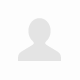
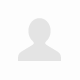
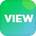

In [40]:
full_html

In [41]:
type(full_html)

str

In [42]:
soup = BeautifulSoup(full_html, 'html.parser') 

<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/112.0.0.0 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="인공지능 : 네이버 VIEW검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'인공지능'의 네이버 VIEW검색 결과입니다." property="og:description"/> <meta content="'인공지능'의 네이버 VIEW검색 결과입니다." lang="ko" name="description"/> <title>인공지능 : 네이버 VIEW검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link hre
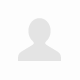
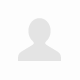
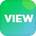

In [43]:
soup

In [44]:
type(soup)

bs4.BeautifulSoup

In [45]:
# class name으로 태그 찾기
# ul 태그에 해당하는 class name은  lst_total _list_base  찾음

content_list = soup.find('ul', class_ = 'lst_total _list_base').find_all('li') 

In [46]:
content_list

[<li class="bx _svp_item" data-cr-area="rvw*o" data-cr-gdid="nad-a001-03-000000238711905" data-cr-rank="1"> <div class="total_wrap type_ad api_ani_send"> <div class="total_area"> <div class="total_info"> <div class="total_source"> <a class="sub_thumb" href="https://adcr.naver.com/adcr?x=LNKq1w04+EbuKHEisxuLb////w==kAK3No5jYTAblW8vOHLE+u+VSvKnhmtDT+eUZTtdFLkIMYsQwkQRmt4OiTjRSPJ0xMiX9CNTsZny+lnum11gBZReI8hLJt8dQQbMhVSD1/ploKOduIsqftZaPfut20ZH4ZhM/96WMAOPIgY+PbMMTayCPVHaGk/b6vde6QFUtCtxENjLk5RuDAEhgmE2K7Bzl8b/yg0EzigRPT1yQh3v/Df0jPtRX4eqzBhZpIDEZnBSGWLwbOIKi5QeoZkoWFgbEXdGbwXtHA/KkVwcQCUyvVh8/SDETRd/2QeACpQDmuXAVhWkw8UlXjdmhRBCGLVv06ab4SgtfYkJzGsu55Xhl6VplZO1ilx87/Y2Da0UcUY/OtEzVb0oRq7AWpT134Gxv7xUGjFp6bjAcDyoSZyLGTi94MCktdUIU2rSvTcjJ/i+4J9/blTSH7686d54PNpUUsAyudDL6sXDbNtbChPbPYth/9bmTHUOLj+vss446hqITFx2bakeIfQqxtn4YtWfTdE5/4zXOFz2YXAuYaB+t0CIVXmEoup0ZPN4ii0x38Co8dh8fJjSmfTQlFtWyUZlKZzVgoi4pTzz56AenksCacCgcujt4BQI2e1iSGwFH4phBZpafvSmmCK51ex6uK35ysZAGRfmzW2hL4PsyyD84Jcj/tugIqAyRlk6tVxP9R1z

In [47]:
type(content_list)

bs4.element.ResultSet

In [48]:
count = 1
for i in content_list:
    #print(i)
    print('●', count, i.text.strip())
    print('-'*50)
    count += 1

● 1 광고   데이터메이커 2023.03.10.  데이터메이커의 인공지능 학습 데이터 구축 성공사례    (주)데이터메이커는 다수의 정부사업을 통해 최소 비용으로 최대 수량의 데이터를 구축한 경험이 많습니다.기존 협의된 견적서 수량과 함께 문의 주시면, 예산 내에서 최대한의 수량으로 드리도록 하겠습니다...
--------------------------------------------------
● 2 광고   MathWorks Korea 2022.11.01.  엔지니어를 위한 인공지능(AI)    비즈니스에 AI를 성공적으로 구현한 성공사례를 살펴보고, 엔지니어로서 필수적으로 알아야할 사항들에 대해 알아보세요. 무료 예제와 비디오를 제공합니다....
--------------------------------------------------
● 3 광고   X2BEE NFT 2023.03.28.  블록체인 몰라도 되는 이커머스,D2C NFT 마케팅    NFT는 블록체인 네트워크를 기반으로 불변성과 고유성을 지니며,그 가치를 통한 무한한 성장 가능성을 가지고 있습니다. 특히 NFT는 MZ 세대의 미닝아웃 소비 성향과 AI 인공지능 교육...
--------------------------------------------------
● 4 문서 저장하기  Keep에 저장 Keep 바로가기        2023.04.09.  The Coloured Universe  초등학습으로 배워보는 수학과 인공지능의 원리    교과서 수학으로 배우는 인공지능 4: 권장 학년 초등 5~6학년 저자 박만구,김영현,최현정,정현웅,박성식 출판 주니어김영사 발매 2022.11.21. 수학, 알고리즘, 인공지능AI, 딥러닝Deep Learning, 챗gpt... 몇 권을 책을 통해 원리와...   10    인공 지능이 보여 줄 세상은 인류에게 어떤 미래인가   함께 볼만한 검색어  이 정보가 표시된 이유  문서를 기반으로 함께 볼만한 검색어를 분석하여 제공하는 서비스입니다.  피드

In [55]:
count = 1
print(type(content_list))

for i in content_list:
    print(type(i))
    print(i.text.strip())
    #print('●', count, i.text.strip())
    print('-'*50)
    count += 1

<class 'bs4.element.ResultSet'>
<class 'bs4.element.Tag'>
광고   데이터메이커 2023.03.10.  데이터메이커의 인공지능 학습 데이터 구축 성공사례    (주)데이터메이커는 다수의 정부사업을 통해 최소 비용으로 최대 수량의 데이터를 구축한 경험이 많습니다.기존 협의된 견적서 수량과 함께 문의 주시면, 예산 내에서 최대한의 수량으로 드리도록 하겠습니다...
--------------------------------------------------
<class 'bs4.element.Tag'>
광고   MathWorks Korea 2022.11.01.  엔지니어를 위한 인공지능(AI)    비즈니스에 AI를 성공적으로 구현한 성공사례를 살펴보고, 엔지니어로서 필수적으로 알아야할 사항들에 대해 알아보세요. 무료 예제와 비디오를 제공합니다....
--------------------------------------------------
<class 'bs4.element.Tag'>
광고   X2BEE NFT 2023.03.28.  블록체인 몰라도 되는 이커머스,D2C NFT 마케팅    NFT는 블록체인 네트워크를 기반으로 불변성과 고유성을 지니며,그 가치를 통한 무한한 성장 가능성을 가지고 있습니다. 특히 NFT는 MZ 세대의 미닝아웃 소비 성향과 AI 인공지능 교육...
--------------------------------------------------
<class 'bs4.element.Tag'>
문서 저장하기  Keep에 저장 Keep 바로가기        2023.04.09.  The Coloured Universe  초등학습으로 배워보는 수학과 인공지능의 원리    교과서 수학으로 배우는 인공지능 4: 권장 학년 초등 5~6학년 저자 박만구,김영현,최현정,정현웅,박성식 출판 주니어김영사 발매 2022.11.21. 수학, 알고리즘, 인공지능AI, 딥러닝Deep Learning, 챗gpt... 몇 권을 

## Step 8. 크롤링 결과를 텍스트 데이터 파일로 저장하기 

sys.stdout 은 표준 출력 장치를 확인할 수 있다.  
디폴트 오리지널 표준 출력 장치는 모니터이다.  

In [56]:
sys.stdout

In [57]:
orig_stdout = sys.stdout

In [58]:
f_name

'C:/temp/네이버_VIEW.txt'

In [59]:
f = open(f_name, 'a', encoding='utf-8') 

In [60]:
f

<_io.TextIOWrapper name='C:/temp/네이버_VIEW.txt' mode='a' encoding='utf-8'>

In [61]:
# 표준 출력 장치를 모니터가 아닌, 파일로 변경
# print 함수의 결과가 모니터가 아닌 파일에 출력된다. 

sys.stdout = f 

In [62]:
count = 1

for i in content_list:
    print('●', count, i.text.strip())
    print('-'*50)
    count += 1

In [55]:
#print("데이터 크롤링 성공 !!!")

In [63]:
sys.stdout = orig_stdout

In [64]:
print("데이터 크롤링 성공 !!!")

데이터 크롤링 성공 !!!


In [65]:
f

<_io.TextIOWrapper name='C:/temp/네이버_VIEW.txt' mode='a' encoding='utf-8'>

In [66]:
f.close()

## Step 9. 한번 더 총 마무리 

In [68]:
 orig_stdout = sys.stdout

In [70]:
f = open(f_name, 'w', encoding='utf-8')

In [71]:
f

<_io.TextIOWrapper name='C:/temp/네이버_VIEW.txt' mode='w' encoding='utf-8'>

In [72]:
sys.stdout = f

In [75]:
html = driver.page_source

In [76]:
soup = BeautifulSoup(html, 'html.parser')

In [78]:
content_list = soup.find('ul', class_ = 'lst_total _list_base').find_all('li') 

In [80]:
for i in content_list :
    print(i.text.strip())
    print('\n')
    
sys.stdout = orig_stdout
f.close()